In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
data = pd.read_csv('/Users/macbookpro/Desktop/TerraSafe/Machine Learning/noaa_ml.csv')

In [3]:
data['clase_sismo'] = pd.qcut(data['magnitudSismo'], q=5, labels=['Muy Leve', 'Leve', 'Medio', "Fuerte", "Muy Fuerte"])
data

,nombreUbicacion,latitud,longitud,magnitudSismo,tsunami,volcan,pais,profundidadSismo,intensidad,fecha,...,ordenCantidadMuertesActualizadas,lesionesActualizadas,ordenCantidadLesionesActualizadas,casasDanadasActualizadas,ordenCantidadCasasDanadasActualizadas,casasDestruidasActualizadas,ordenCantidadCasasDestruidasActualizadas,danosActualizados,ordenCantidadDanosActualizados,clase_sismo
0,JAPAN: UCHIURA BAY,42.070,140.680,6.5,1,1,JAPAN,40.153361,7.856559,1640-07-31,...,3.0,1.0,1.0,1.0,3.0,20.0,1.0,0.5,1.0,Medio
1,JAPAN: NEAR S COAST HONSHU: KOZU-SHIMA,34.221,139.131,6.1,1,1,JAPAN,10.000000,7.856559,2000-07-01,...,1.0,101.0,3.0,1.0,3.0,101.0,3.0,0.5,1.0,Leve
2,RWANDA: RUBAVU; CONGO,-1.601,29.400,4.7,0,1,RWANDA,10.000000,7.000000,2021-05-25,...,1.0,1.0,1.0,1.0,1.0,5000.0,4.0,5.0,3.0,Muy Leve
3,CHINA: SHAANXI PROVINCE,35.600,110.900,5.4,0,0,CHINA,40.153361,7.000000,1959-08-10,...,1.0,1.0,1.0,1.0,3.0,43.0,1.0,0.5,1.0,Muy Leve
4,"PERU: CAMANA, AREQUIPA",-16.660,-72.662,6.8,0,0,PERU,87.000000,6.000000,1999-04-03,...,1.0,50.0,1.0,300.0,3.0,101.0,3.0,1.0,2.0,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,PERU,-16.300,-71.000,8.0,0,0,PERU,25.000000,9.000000,1471-00-00,...,1.0,1.0,1.0,1.0,3.0,101.0,3.0,1.0,2.0,Muy Fuerte
4582,"INDONESIA: JAVA: LABUHAN, MENES, PONOROGO",-6.400,105.400,6.6,1,0,INDONESIA,64.000000,7.856559,1963-12-16,...,1.0,1.0,1.0,1.0,1.0,101.0,3.0,0.5,1.0,Medio
4583,CHINA: TIBET (XIZANG PROVINCE),29.807,90.350,6.3,0,0,CHINA,12.000000,7.856559,2008-10-06,...,1.0,19.0,1.0,1.0,3.0,101.0,3.0,1.0,2.0,Medio
4584,PERU,-12.200,-77.600,7.8,0,0,PERU,30.000000,7.000000,1582-08-15,...,1.0,1.0,1.0,1.0,3.0,101.0,3.0,1.0,2.0,Muy Fuerte


In [4]:
# Supongamos que tienes un DataFrame llamado 'data' que contiene tus datos de sismos

# Divide los datos en características (X) y etiquetas/clases (y)
X = data[['magnitudSismo','profundidadSismo','intensidad','ordenCantidadMuertesActualizadas','ordenCantidadCasasDestruidasActualizadas']]
y = data['clase_sismo']  # Reemplaza 'etiqueta_de_clase' con la columna que contiene las etiquetas/clases de los sismos

In [ ]:
#Configura el número de centros para los nodos ocultos:
#n_centers = 10

In [5]:
#dividimos la data prueba y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
y_pred = model.predict(X_test)


In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.4477124183006536


In [9]:
from sklearn.metrics import classification_report

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Fuerte       0.39      0.60      0.47       200
        Leve       0.38      0.47      0.42       167
       Medio       0.28      0.14      0.19       181
  Muy Fuerte       0.37      0.29      0.32       167
    Muy Leve       0.76      0.68      0.72       203

    accuracy                           0.45       918
   macro avg       0.44      0.44      0.42       918
weighted avg       0.44      0.45      0.43       918



MATRIZ DE CONFUSION 

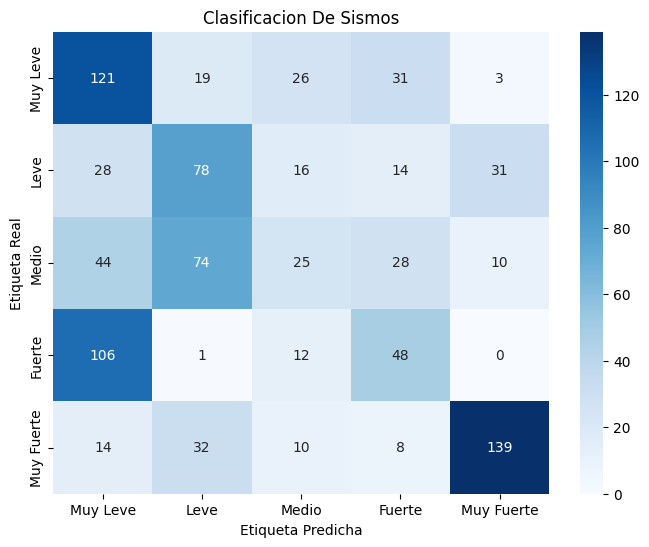

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels = ['Muy Leve', 'Leve', 'Medio', "Fuerte", "Muy Fuerte"] , yticklabels =['Muy Leve', 'Leve', 'Medio', "Fuerte", "Muy Fuerte"])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Clasificacion De Sismos')
plt.show()